In [2]:
import pandas as pd
df=pd.read_csv('d:/data/wine/winequality-red2.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [3]:
df['class'].value_counts()

1    855
0    744
Name: class, dtype: int64

In [4]:
train_cols=df.columns[0:11]
X=df[train_cols]
y=df['class']

In [7]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [9]:
df2['class'].value_counts() 

1    744
0    744
Name: class, dtype: int64

In [10]:
X=X_samp[train_cols] #독립변수
y=y_samp['class'] #종속변수

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=10)

In [15]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(random_state=100,max_iter=500)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
print('학습용:{:6.2f}%'.format(model.score(X_train,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test,y_test)*100))

학습용: 75.04%
검증용: 71.14%


In [22]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,8.293866,0.537391,0.266328,2.520840,0.088315,15.689916,46.411765,0.996775,3.310496,0.653966,10.374454
std,1.695893,0.182288,0.194614,1.335558,0.049434,10.182278,32.768471,0.001859,0.151705,0.168823,1.049314
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995650,3.210000,0.550000,9.500000
50%,7.900000,0.530000,0.250000,2.200000,0.080000,13.500000,37.000000,0.996800,3.310000,0.620000,10.100000
75%,9.100000,0.645000,0.420000,2.600000,0.091000,21.000000,63.000000,0.997835,3.390000,0.720000,11.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.000000


In [30]:
#0~1 정규화
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test - mean_on_train)/std_on_train

In [31]:
model=MLPClassifier(random_state=100,max_iter=5000)
model.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [33]:
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용: 99.50%
검증용: 76.51%


In [40]:
#은닉층을 2개로 늘린 모형
model=MLPClassifier(random_state=100,
                   hidden_layer_sizes=[100,100],max_iter=5000)
model.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [41]:
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용: 99.92%
검증용: 77.52%


In [38]:
#은닉층 2
model=MLPClassifier(random_state=100,
                   hidden_layer_sizes=[200],max_iter=5000)
model.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[200], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용: 98.91%
검증용: 76.17%


In [42]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,109,40
1,27,122


최적의 k: 3
최적의 정확도: 0.7818791946308725


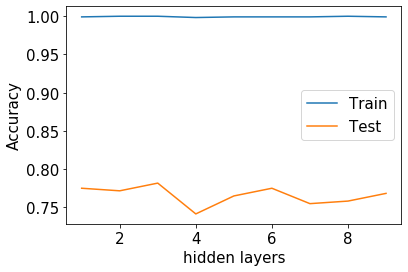

In [46]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,301,100):
    for j in range(100,301,100):
        model=MLPClassifier(random_state=100,
                           hidden_layer_sizes=[i,j],max_iter=5000)
        model.fit(X_train_scaled,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))
        
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('hidden layers')
plt.legend()

max_rate=max(test_rate)
idx=np.where(test_rate == max_rate)[0][0]
print('최적의 k:',idx+1)
print('최적의 정확도:',max_rate)

In [47]:
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용: 99.92%
검증용: 76.85%
